In [70]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [71]:
# Loading the data
data = pd.read_csv('game_details_with_counts.csv')

# Creating 'cult_classic' feature
data['cult_classic'] = ((data['users_rated'] > 5000) & 
                        (data['average_rating'] > 8.0)).astype(int)

# Selecting relevant features for Decision Tree modeling
features = data[['category_count', 'mechanic_count', 'min_players', 'max_players', 'min_playtime', 'max_playtime', 'weight', 'users_rated']]
target = data['cult_classic']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Checking the first few rows of the dataset
print(data[['name', 'cult_classic']].head())


                name  cult_classic
0              CATAN             0
1        Carcassonne             0
2           Pandemic             0
3          7 Wonders             0
4  Terraforming Mars             1


Accuracy: 0.9511111111111111
Confusion Matrix:
 [[840  20]
 [ 24  16]]


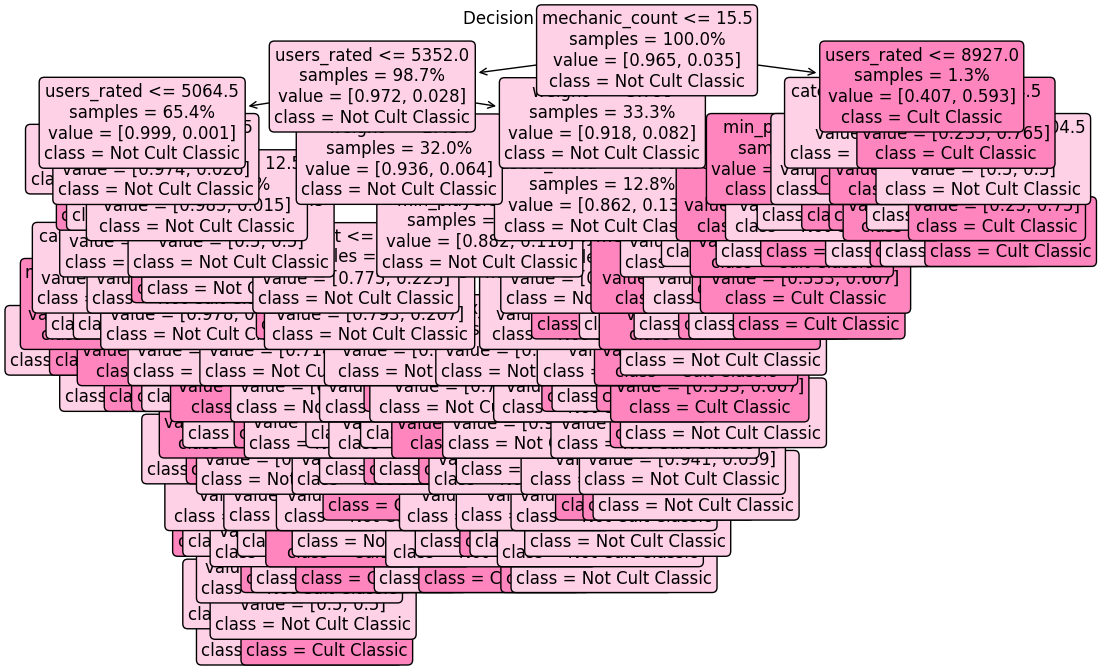

In [72]:
# Initialize and train the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the tree and get the object for further manipulation
plt.figure(figsize=(12, 8))
plot_tree(dt, 
          feature_names=features.columns, 
          class_names=['Not Cult Classic', 'Cult Classic'], 
          filled=True, 
          rounded=True, 
          fontsize=12, 
          impurity=False, 
          proportion=True)

# Changing the colors based on the class
for ax in plt.gcf().axes:
    for text in ax.texts:
        # Check the text to find the class name (Not Cult Classic or Cult Classic)
        if "Not Cult Classic" in text.get_text():
            text.set_backgroundcolor('#ffd1e7')  
        elif "Cult Classic" in text.get_text():
            text.set_backgroundcolor('#ff85bf')  

# Set the title and show the plot
plt.title("Decision Tree Classifier")
plt.savefig('decision_tree.png')
plt.show()




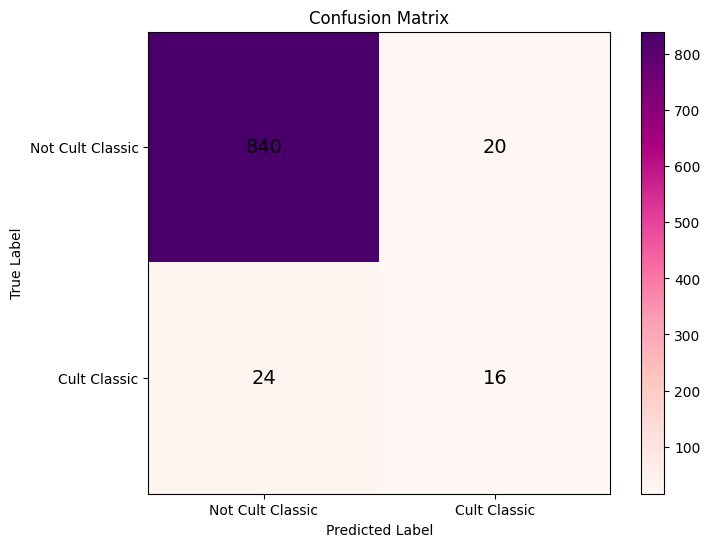

Accuracy of the Decision Tree: 0.9511111111111111


In [73]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='RdPu', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.yticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotating the confusion matrix with values
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.savefig('confusion_matrix.png')
plt.show()

# Print the accuracy
print("Accuracy of the Decision Tree:", accuracy)


Example 1 - Accuracy: 0.9644444444444444
Example 1 - Confusion Matrix:
 [[852   8]
 [ 24  16]]


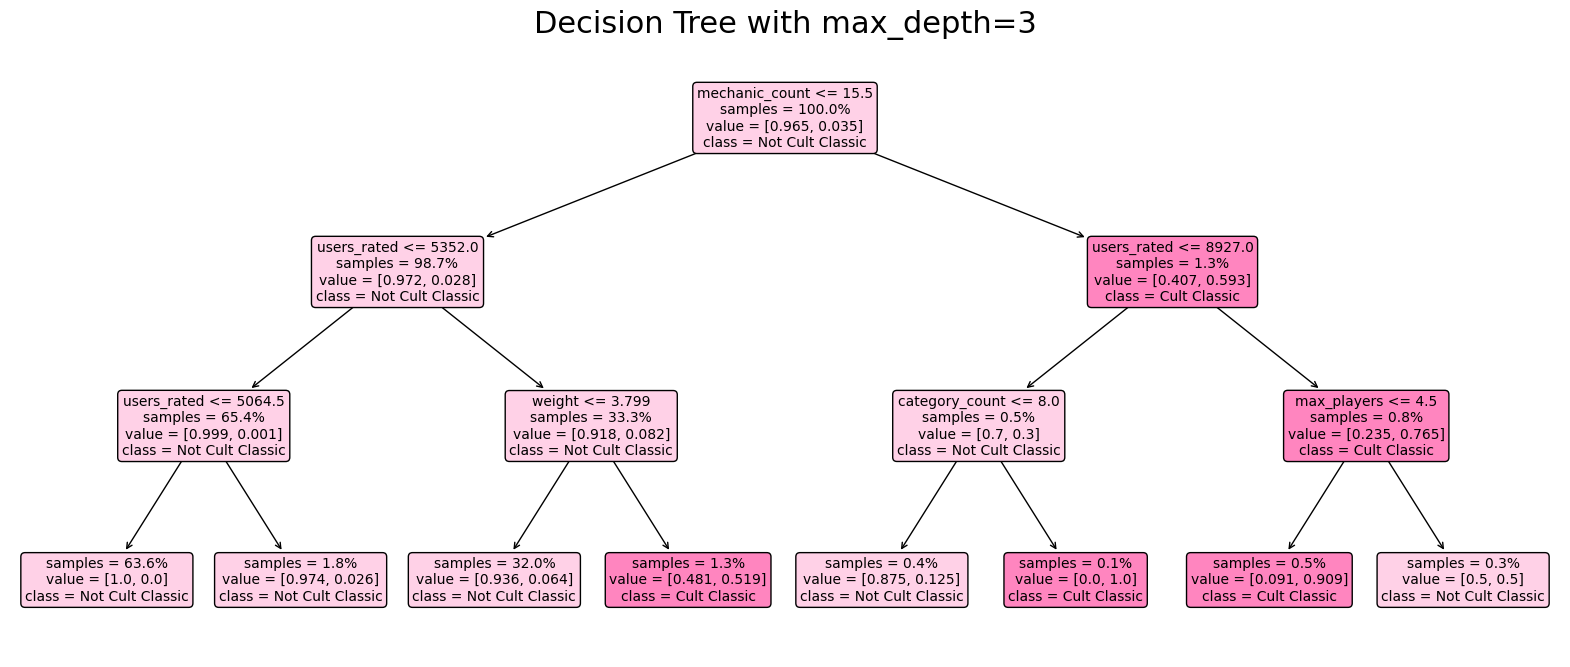

In [74]:
# Tree 1: Decision Tree with max_depth=3
dt1 = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3)
dt1.fit(X_train, y_train)
y_pred1 = dt1.predict(X_test)

# Evaluating the model
accuracy1 = accuracy_score(y_test, y_pred1)
print("Example 1 - Accuracy:", accuracy1)

# Generating the confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred1)
print("Example 1 - Confusion Matrix:\n", conf_matrix1)

# Creating a function to plot decision tree with custom colors
def plot_custom_tree(dt, title):
    plt.figure(figsize=(20, 8))
    plot_tree(dt, 
              feature_names=features.columns,    
              class_names=['Not Cult Classic', 'Cult Classic'],    
              filled=True,    
              rounded=True,    
              fontsize=10,    
              impurity=False,    
              proportion=True)

    # Changing the colors based on the class
    for ax in plt.gcf().axes:        
        for text in ax.texts:            
            # Check the text to find the class name (Not Cult Classic or Cult Classic)            
            if "Not Cult Classic" in text.get_text():                
                text.set_backgroundcolor('#ffd1e7')              
            elif "Cult Classic" in text.get_text():                
                text.set_backgroundcolor('#ff85bf')  

    # Set the title and show the plot
    plt.title(title, fontsize=22)
    #save the plot based off the title
    plt.savefig(title + '.png')
    plt.show()

# Plot the tree for the first example
plot_custom_tree(dt1, "Decision Tree with max_depth=3")



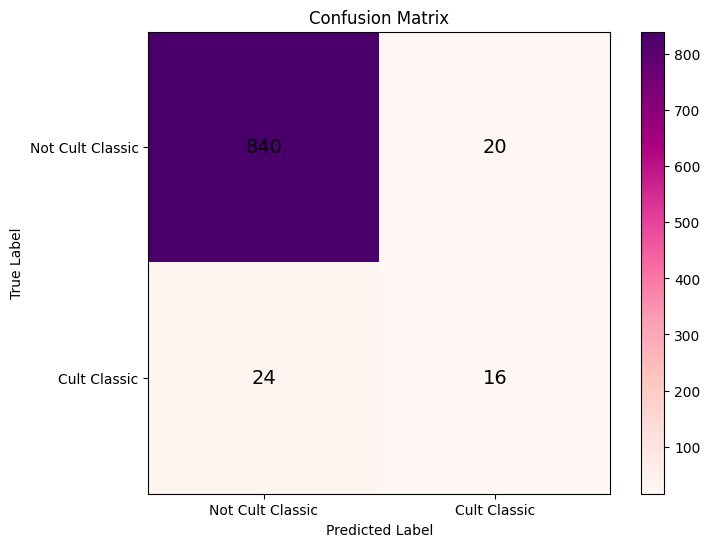

In [75]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='RdPu', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.yticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotating the confusion matrix with values
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.savefig('confusion_matrix_max_depth3.png')
plt.show()


Example 2 - Accuracy: 0.9666666666666667
Example 2 - Confusion Matrix:
 [[857   3]
 [ 27  13]]


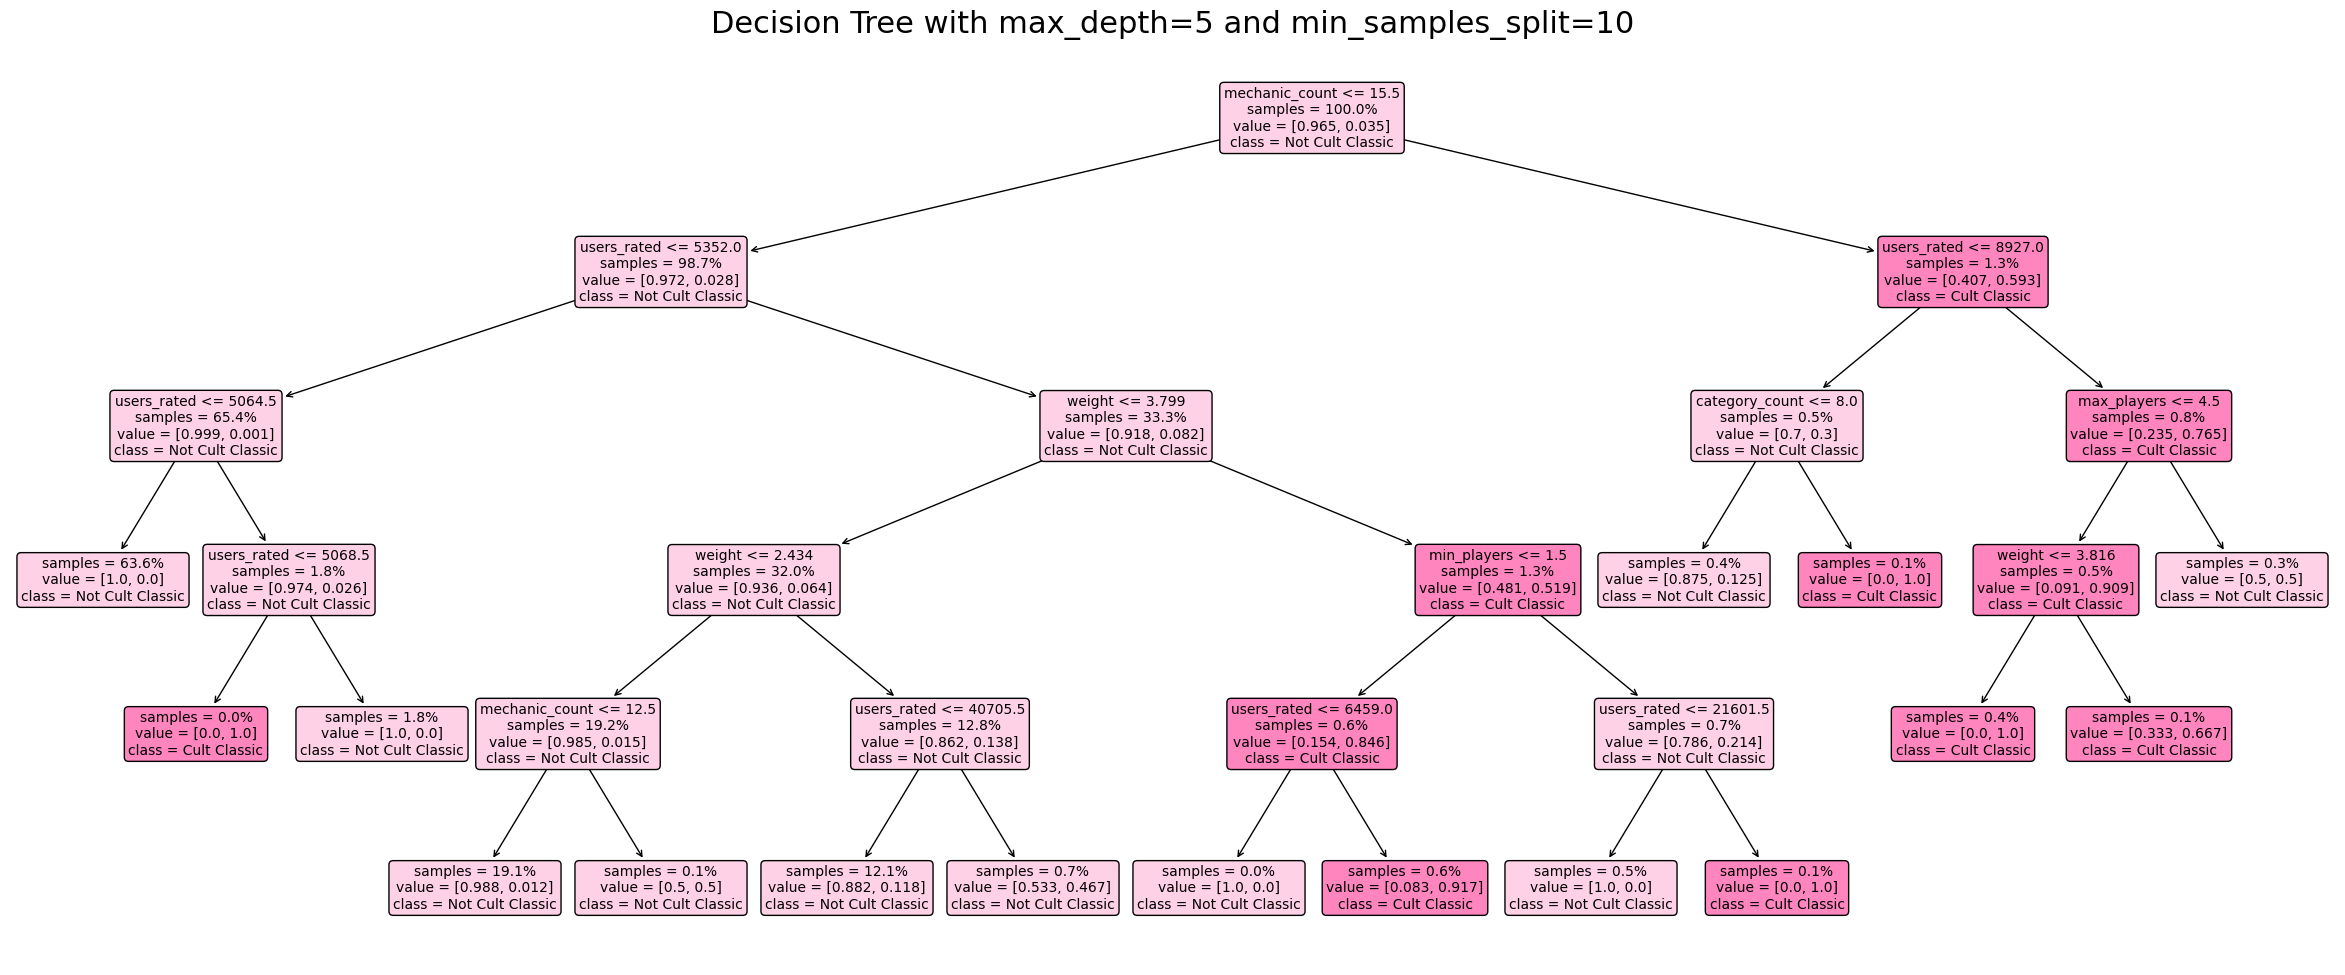

In [76]:

# Tree 2: Decision Tree with max_depth=5, min_samples_split=10
dt2 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion='gini', random_state=42)
dt2.fit(X_train, y_train)
y_pred2 = dt2.predict(X_test)

# Evaluating the model
accuracy2 = accuracy_score(y_test, y_pred2)
print("Example 2 - Accuracy:", accuracy2)

# Generating the confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Example 2 - Confusion Matrix:\n", conf_matrix2)

# Creating a function to plot decision tree with custom colors
def plot_custom_tree2(dt, title):
    plt.figure(figsize=(30, 12))
    plot_tree(dt, 
              feature_names=features.columns,    
              class_names=['Not Cult Classic', 'Cult Classic'],    
              filled=True,    
              rounded=True,    
              fontsize=10,    
              impurity=False,    
              proportion=True)

    # NChanging the colors based on the class
    for ax in plt.gcf().axes:        
        for text in ax.texts:            
            # Check the text to find the class name (Not Cult Classic or Cult Classic)            
            if "Not Cult Classic" in text.get_text():                
                text.set_backgroundcolor('#ffd1e7')              
            elif "Cult Classic" in text.get_text():                
                text.set_backgroundcolor('#ff85bf') 

    plt.title(title, fontsize=22)  
    plt.savefig(title + '.png')
    plt.show()

# Plot the tree for the second example
plot_custom_tree2(dt2, "Decision Tree with max_depth=5 and min_samples_split=10")




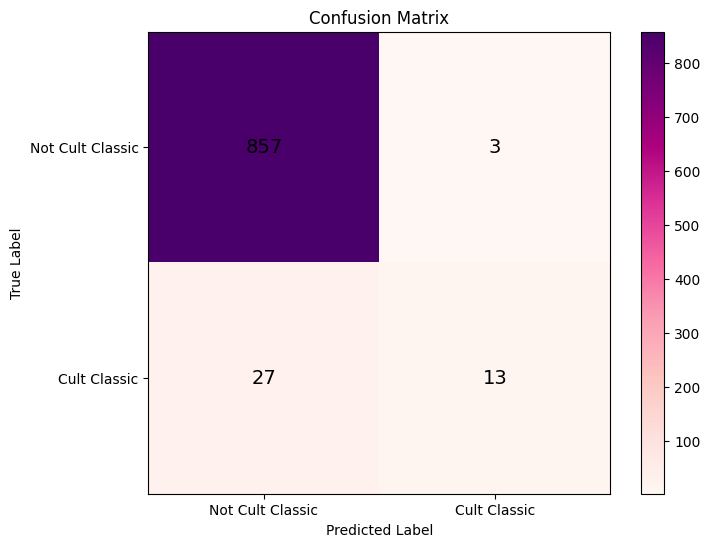

In [77]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix2, cmap='RdPu', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.yticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotating the confusion matrix with values
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix2[i, j]), horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.savefig('confusion_matrix_max_depth5_min_samples_split10.png')
plt.show()


Example 3 - Accuracy: 0.9544444444444444
Example 3 - Confusion Matrix:
 [[859   1]
 [ 40   0]]


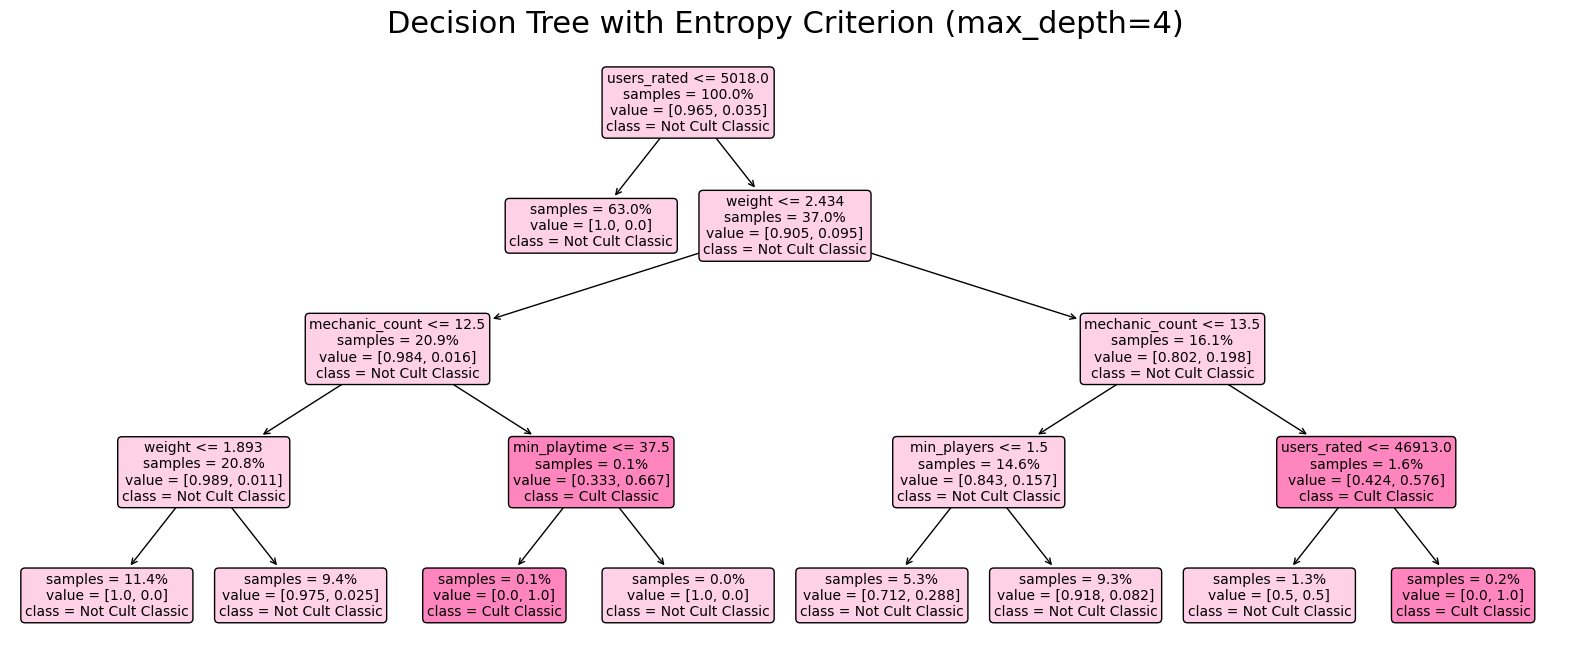

In [78]:
# Tree 3: Decision Tree with entropy criterion and limited max_depth for readability
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)  # Adjust max_depth here
dt3.fit(X_train, y_train)
y_pred3 = dt3.predict(X_test)

# Evaluating the model
accuracy3 = accuracy_score(y_test, y_pred3)
print("Example 3 - Accuracy:", accuracy3)

# Generating the confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_pred3)
print("Example 3 - Confusion Matrix:\n", conf_matrix3)

# Plotting the tree for the third example with max_depth constraint
plot_custom_tree(dt3, "Decision Tree with Entropy Criterion (max_depth=4)")




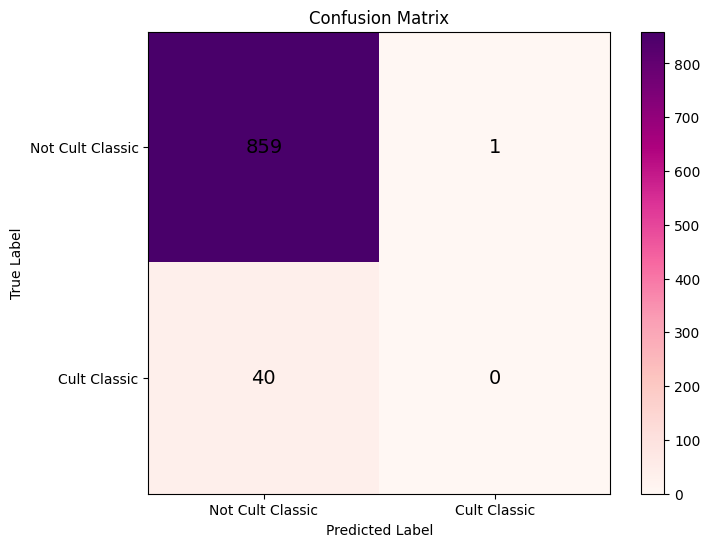

In [79]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix3, cmap='RdPu', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.yticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotating the confusion matrix with values
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix3[i, j]), horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.savefig('confusion_matrix_entropy_max_depth4.png')
plt.show()
